<a href="https://www.kaggle.com/code/silentki1ler/titanic-space-prediction?scriptVersionId=125748264" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [1]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

# Read Data

In [2]:
# Reading Datasets
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
submission_id = test.PassengerId

In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Explore the data

In [4]:
# Seperating values
test[['PassengerGGG', 'PassengerPP']] = test['PassengerId'].str.split('_', expand = True)
test['PassengerGGG'] = test['PassengerGGG'].astype(float)
test['PassengerPP'] = test['PassengerPP'].astype(float)

train[['PassengerGGG', 'PassengerPP']] = train['PassengerId'].str.split('_', expand = True)
train['PassengerGGG'] = train['PassengerGGG'].astype(float)
train['PassengerPP'] = train['PassengerPP'].astype(float)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  PassengerGGG  4277 non-null   float64
 14  PassengerPP   4277 non-null   float64
dtypes: float64(8), object(7)
memory usage: 501.3+ KB


In [6]:
# Convert floats to int
test[['PassengerGGG','PassengerPP']]=test[['PassengerGGG','PassengerPP']].astype(int)
train[['PassengerGGG','PassengerPP']]=train[['PassengerGGG','PassengerPP']].astype(int)

In [7]:
# Splitting cabin column into deck, cabin_num, Side
test[['Deck', 'cabin_num', 'Side']] = test['Cabin'].str.split('/', expand = True)
test['cabin_num'] = test['cabin_num'].astype(float)

train[['Deck', 'cabin_num', 'Side']] = train['Cabin'].str.split('/', expand = True)
train['cabin_num'] = train['cabin_num'].astype(float)


In [8]:
train = train.drop(columns = ['PassengerId','Name'])

# Encode the data

In [9]:
# Encode categorical values to numerical values
enc = OrdinalEncoder()
test[['CryoSleep','VIP']]=enc.fit_transform(test[['CryoSleep','VIP']])
enc.fit(test[['CryoSleep','VIP']])

OrdinalEncoder()

In [10]:
# Encode categorical values to numerical values
train[['CryoSleep','VIP','Transported']]=enc.fit_transform(train[['CryoSleep','VIP','Transported']])
enc.fit(train[['CryoSleep','VIP','Transported']])

OrdinalEncoder()

In [11]:
# Filling missing planet,CryoSleep,vip data with its front value
test[['HomePlanet','CryoSleep','VIP']]=test[['HomePlanet','CryoSleep','VIP']].fillna(method = 'ffill')
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(method = 'ffill')

In [12]:
test = pd.get_dummies(test,columns=['Destination','HomePlanet'])
train = pd.get_dummies(train,columns=['Destination','HomePlanet'])

In [13]:
test = pd.get_dummies(test,columns=['Deck','Side'])
train = pd.get_dummies(train,columns=['Deck','Side'])

In [14]:
test[['CryoSleep','VIP']]=test[['CryoSleep','VIP']].fillna(method ='ffill').astype(int)
train[['CryoSleep','VIP','Transported']]=train[['CryoSleep','VIP','Transported']].astype(int)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   CryoSleep                  4277 non-null   int64  
 2   Cabin                      4177 non-null   object 
 3   Age                        4186 non-null   float64
 4   VIP                        4277 non-null   int64  
 5   RoomService                4195 non-null   float64
 6   FoodCourt                  4171 non-null   float64
 7   ShoppingMall               4179 non-null   float64
 8   Spa                        4176 non-null   float64
 9   VRDeck                     4197 non-null   float64
 10  Name                       4183 non-null   object 
 11  PassengerGGG               4277 non-null   int64  
 12  PassengerPP                4277 non-null   int64  
 13  cabin_num                  4177 non-null   float

In [16]:
test.drop(columns = ['Cabin','Name','PassengerId'],inplace = True)

In [17]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGGG,PassengerPP,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,13,1,...,0,0,0,0,0,0,1,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,1,...,0,0,0,0,0,1,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,...,0,0,1,0,0,0,0,0,0,1
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,...,0,0,1,0,0,0,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,23,1,...,0,0,0,0,0,1,0,0,0,1


In [18]:
# Change type to int
test[['Destination_55 Cancri e', 'Destination_PSO J318.5-22','Destination_TRAPPIST-1e','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars']]=test[['Destination_55 Cancri e', 'Destination_PSO J318.5-22','Destination_TRAPPIST-1e','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars']].astype(int)
train[['Destination_55 Cancri e', 'Destination_PSO J318.5-22','Destination_TRAPPIST-1e','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars']]=train[['Destination_55 Cancri e', 'Destination_PSO J318.5-22','Destination_TRAPPIST-1e','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars']].astype(int)

In [19]:
# Change type to int
test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

In [20]:
# Change type to int
test[['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Side_P','Side_S']]=test[['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Side_P','Side_S']].astype(int)
train[['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Side_P','Side_S']]=train[['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Side_P','Side_S']].astype(int)

In [21]:
# Changing datattype to int and filling missing data
train['cabin_num']=train['cabin_num'].fillna(method='ffill').astype(int)
test['cabin_num']=test['cabin_num'].fillna(method='ffill').astype(int)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Cabin                      8494 non-null   object 
 2   Age                        8514 non-null   float64
 3   VIP                        8693 non-null   int64  
 4   RoomService                8512 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   int64  
 10  PassengerGGG               8693 non-null   int64  
 11  PassengerPP                8693 non-null   int64  
 12  cabin_num                  8693 non-null   int64  
 13  Destination_55 Cancri e    8693 non-null   int64

In [23]:
x=train['Transported'].value_counts()
x

1    4378
0    4315
Name: Transported, dtype: int64

# Visualizing data for relations

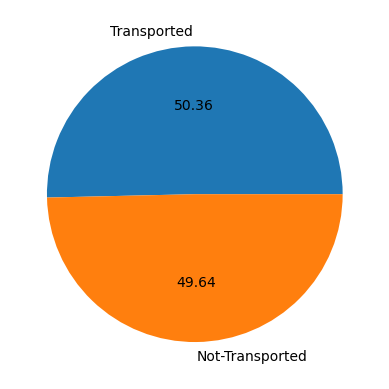

In [24]:
# plotting percentage of people tranported
plt.pie(x, labels = ['Transported','Not-Transported'],autopct='%0.2f')
plt.show()

In [25]:
train.dtypes

CryoSleep                      int64
Cabin                         object
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
PassengerGGG                   int64
PassengerPP                    int64
cabin_num                      int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Deck_A                         int64
Deck_B                         int64
Deck_C                         int64
Deck_D                         int64
Deck_E                         int64
Deck_F                         int64
Deck_G                         int64
Deck_T                         int64
S

<AxesSubplot:>

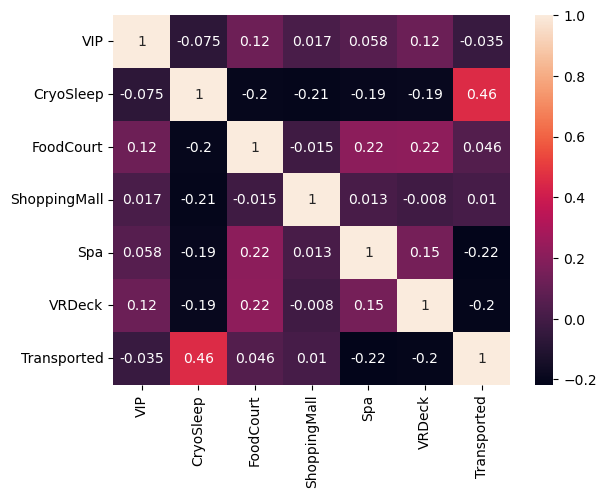

In [26]:
# plotting to check correlation before encoding
df1 = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']]
sns.heatmap(df1.corr(),annot = True)

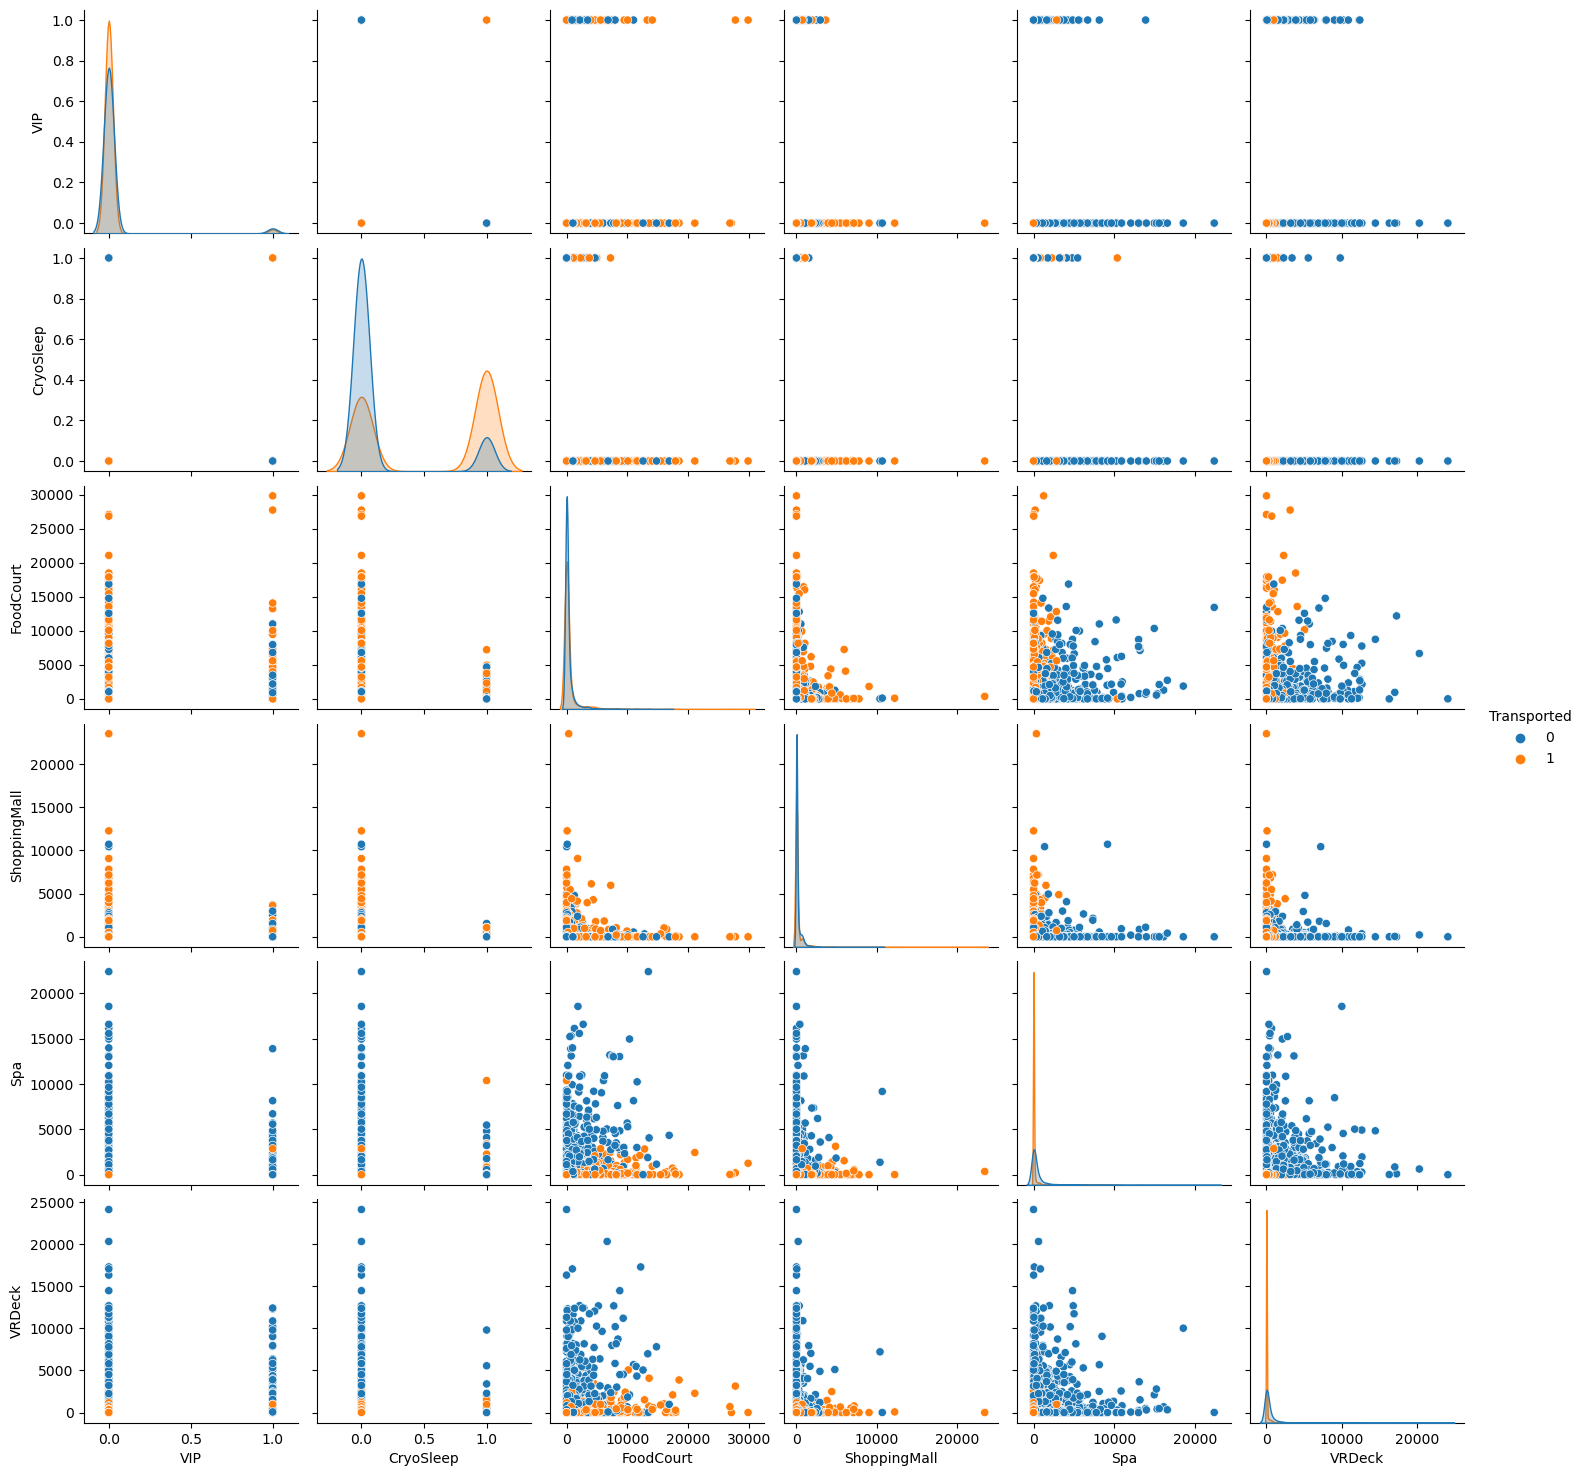

In [27]:
# plotting to check patterns if transportation is dependent on any factor
sns.pairplot(df1,hue = 'Transported')

In [28]:
train.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,0,0,0,0,0,1,0,0,0,1


In [29]:
# drop dummy columns
train=train.drop(columns = ['Cabin'])

# Model selection and Scores

In [30]:
# import scikitlearn libraries to select models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [31]:
# train data
y = train["Transported"]
X = train.drop(["Transported"], axis = 1)

In [32]:
# check for missing values after encoding
X.isnull().sum()

CryoSleep                      0
Age                          179
VIP                            0
RoomService                  181
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
PassengerGGG                   0
PassengerPP                    0
cabin_num                      0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
dtype: int64

In [33]:
# Normalize missing values
X[['Age','RoomService','cabin_num']]=X[['Age','RoomService','cabin_num']].fillna(method='ffill')

In [34]:
# Change dtypes if any
X['cabin_num']=X['cabin_num'].astype(int)

In [35]:
X.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
PassengerGGG                 0
PassengerPP                  0
cabin_num                    0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

## Split data into Train and Test

In [36]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 2)

In [37]:
# Import all the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [38]:
# Initializing models

svc = SVC(kernel = 'linear', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 15)
lrc = LogisticRegression(solver = 'liblinear')
rfc = RandomForestClassifier(n_estimators = 200,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 200,random_state = 2)
bc = BaggingClassifier(n_estimators = 200,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 200,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 200,random_state = 2)
xgb = XGBClassifier(n_estimators = 200,random_state = 2)

In [39]:
# Dictionary of Models to print results

clfs = {
    'SVC':svc,
    'KNC':knc,
    'MNB':mnb,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [40]:
# Function to fit Models and get scores
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
    return accuracy,precision,balanced_accuracy

accuracy_scores = []
precision_scores = []
balanced_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision,current_balanced_accuracy = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print("Precision - ",current_precision)
    print("Balanced Score - ",current_balanced_accuracy)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    balanced_scores.append(current_balanced_accuracy)

For  SVC
Accuracy -  0.7975460122699386
Precision -  0.7935714285714286
Balanced Score -  0.7966166166166166
For  KNC
Accuracy -  0.7580521472392638
Precision -  0.7629846378931968
Balanced Score -  0.7575204616381087
For  MNB
Accuracy -  0.7572852760736196
Precision -  0.7097717963721475
Balanced Score -  0.7521209444738857
For  DTC
Accuracy -  0.7603527607361963
Precision -  0.7829820452771272
Balanced Score -  0.760988635694518
For  LRC
Accuracy -  0.8013803680981595
Precision -  0.8014492753623188
Balanced Score -  0.8007266089619031
For  RFC
Accuracy -  0.8094325153374233
Precision -  0.8414731785428343
Balanced Score -  0.8105629158570336
For  ABC
Accuracy -  0.8006134969325154
Precision -  0.7955840455840456
Balanced Score -  0.7996337513984573
For  BC
Accuracy -  0.7994631901840491
Precision -  0.8268774703557312
Balanced Score -  0.800364482129188
For  ETC
Accuracy -  0.7983128834355828
Precision -  0.8388157894736842
Balanced Score -  0.7998763469351704
For  GBDT
Accuracy -  

In [41]:
# Move the data to dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Balanced Score':balanced_scores})
performance_df

,Algorithm,Accuracy,Precision,Balanced Score
0,SVC,0.797546,0.793571,0.796617
1,KNC,0.758052,0.762985,0.757520
2,MNB,0.757285,0.709772,0.752121
3,DTC,0.760353,0.782982,0.760989
4,LRC,0.801380,0.801449,0.800727
5,RFC,0.809433,0.841473,0.810563
6,ABC,0.800613,0.795584,0.799634
7,BC,0.799463,0.826877,0.800364
8,ETC,0.798313,0.838816,0.799876
9,GBDT,0.820169,0.821298,0.819660


# Best model

In [42]:
# Best model with precision, balance and accuracy is rfc
gbdt = GradientBoostingClassifier(n_estimators = 200,random_state = 2)
gbdt.fit(X_train, y_train)
prediction = gbdt.predict(X_test)
accuracy_score(y_test, prediction)

0.8201687116564417

In [43]:
test.isnull().sum()
test[['Age','RoomService']]=test[['Age','RoomService']].fillna(method = 'ffill')

# Save Data

In [44]:
submit_pred = rfc.predict(test)
submit_pred = submit_pred.astype(bool)
output = pd.DataFrame({"PassengerId": submission_id ,
                       "Transported": submit_pred})
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [45]:
submission =pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
submission['Transported'] = submit_pred
submission.to_csv('submission.csv', index=False)

### I thank 'Gusthema' for reference
### I thank 'Kaggle' for reference and datasets

# Author : Samanth Kumar